# Scedastic Surrogate Swarm Tests

In [1]:
from sssopy import SurrogateSearch, SSSoProblem, SurrogateSwarm, plot_optimizer_results_with_rec
import numpy as np

In [2]:
def model_function(params,args):
    input_vals, check = args
    modval = params[0] * np.cos(input_vals * params[1]) + params[1] * np.sin(input_vals * params[0])
    #modval = params[0] + input_vals**2 * params[1]**2
    global objective_function_calls
    objective_function_calls += 1
    return modval

def ineq_constraints(params):
    # ineq1 = (params[0]-params[1])
    # ineq2 = (params[0]-params[1])
    return [0]

def eq_constraints(params):
    # eq1 = (params[0]+params[1])-0.72
    return [0]


In [3]:
objective_function_calls = 0

check = 1
xdat = np.arange(1, 100.5, 0.5)
params = np.array([0.32, 0.4])
opt_problem = SSSoProblem(model_function = model_function,
                            ineq_constraints = ineq_constraints,
                            eq_constraints = eq_constraints,
                            args = (xdat,check)
                            )
ydat = opt_problem.eval_function(params)


## Surrogate Swarm Test

Fitting failed for rbf model: Singular matrix.


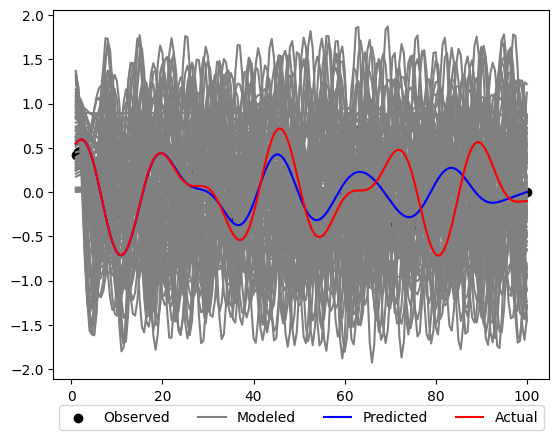

[0.4472221  0.27398806]
Objective Function Calls: 201


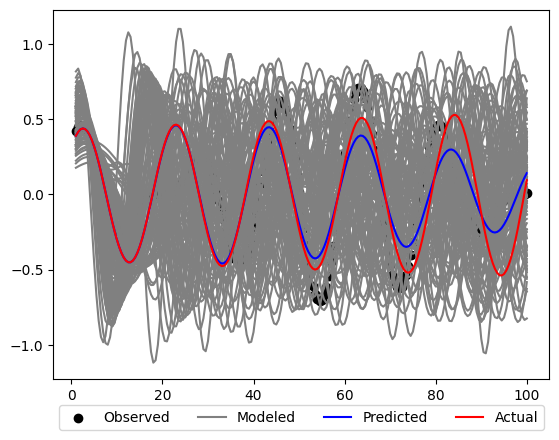

[0.31097984 0.30504724]
Objective Function Calls: 302


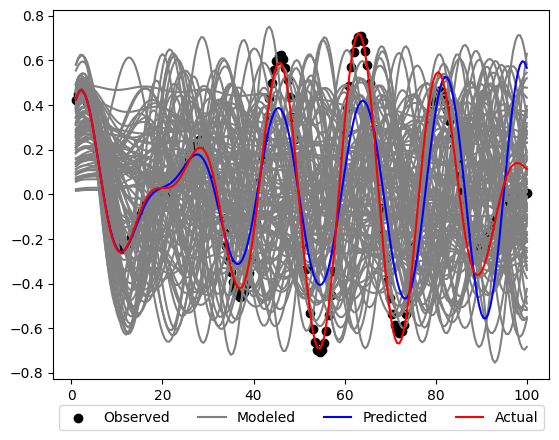

[0.32283168 0.39906098]
Objective Function Calls: 403


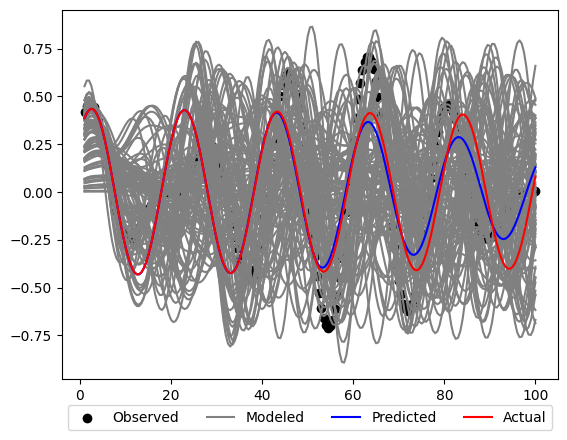

[0.30758524 0.30917504]
Objective Function Calls: 504


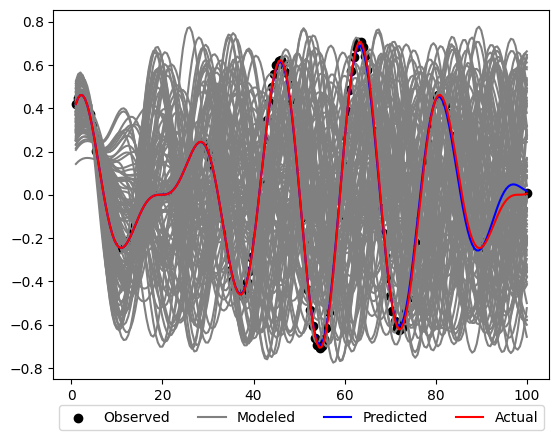

[0.31949167 0.39934829]
Objective Function Calls: 605


In [4]:
objective_function_calls = 0

swarmer = SurrogateSwarm(opt_problem,
                            ydat,
                            2,
                            [0,0],
                            [1,1])

for itt in range(5):
        swarmer.step_swarm()
        swarmer.swarm_state["surrogate_recommendations"]
        plot_optimizer_results_with_rec(swarmer.swarm_state["pos_x"],
                                        swarmer.swarm_state["pos_results"],
                                        xdat,
                                        ydat,
                                        swarmer.swarm_state["surrogatesaves"],
                                        swarmer.swarm_state["centersaves"],
                                        swarmer.swarm_state["surrogate_recommendations"],
                                        optproblem = opt_problem
                                        )
        # print(np.mean(swarmer.swarm_state["pos_x"],axis = 0))
        print(swarmer.swarm_state["surrogate_recommendations"])
        print(f"Objective Function Calls: {objective_function_calls}")

## Surrogate Search Test

In [5]:
objective_function_calls = 0

searcher = SurrogateSearch(opt_problem,
                               ydat,
                               2,
                               [0,0],
                               [1,1])
    
for itt in range(15):
    searcher.step_search()
    plot_optimizer_results_with_rec(searcher.search_state["pos_x"],
                                    searcher.search_state["pos_results"],
                                    xdat,
                                    ydat,
                                    searcher.search_state["surrogatesaves"],
                                    searcher.search_state["centersaves"],
                                    searcher.search_state["surrogate_recommendations"][0],
                                    optproblem = opt_problem)
    # print(searcher.search_state["pos_x"])
    print(searcher.search_state["surrogate_recommendations"])
    print(f"Objective Function Calls: {objective_function_calls}")

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 0

## Search-Initialized Surrogate Swarm Test

In [ ]:
objective_function_calls = 0

searchswarmer = SurrogateSwarm(opt_problem,
                            ydat,
                            2,
                            [0,0],
                            [1,1],
                            surrogatesaves=searcher.search_state["surrogatesaves"],
                            centersaves=searcher.search_state["centersaves"],
                            all_pos=searcher.search_state["all_pos"],
                            all_results=searcher.search_state["all_results"])

for itt in range(20):
        searchswarmer.step_swarm()
        searchswarmer.swarm_state["surrogate_recommendations"]
        plot_optimizer_results_with_rec(searchswarmer.swarm_state["pos_x"],
                                        searchswarmer.swarm_state["pos_results"],
                                        xdat,
                                        ydat,
                                        searchswarmer.swarm_state["surrogatesaves"],
                                        searchswarmer.swarm_state["centersaves"],
                                        searchswarmer.swarm_state["surrogate_recommendations"],
                                        optproblem = opt_problem
                                        )
        # print(np.mean(searchswarmer.swarm_state["pos_x"],axis = 0))
        print(searchswarmer.swarm_state["surrogate_recommendations"])
        print(f"Objective Function Calls: {objective_function_calls}")